In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import export_graphviz

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
data = pd.read_csv("vispremv.dat",sep=" ")

In [7]:
data

SEXEQ FAMIQ PCSPQ kvunbq vienbq uemnbq xlgnbq ylvnbq rocnbq nptagq  \
148009   Shom  Fcou  Pint     K1     V1     U2     X2     Y2     R1     N0   
552427   Shom  Fcou  Pint     K0     V0     U1     X0     Y1     R0     N0   
556005   Shom  Fseu  Psan     K0     V0     U2     X1     Y2     R1     N0   
556686   Shom  Fseu  Pouv     K0     V1     U2     X2     Y2     R1     N1   
642680   Shom  Fcou  Pint     K0     V0     U2     X1     Y2     R1     N0   
...       ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   
7567726  Sfem  Fcou  Psan     K0     V0     U1     X1     Y0     R0     N0   
7572458  Sfem  Fcou  Pint     K0     V0     U1     X1     Y0     R0     N0   
7574479  Sfem  Fcou  Pouv     K0     V0     U1     X1     Y0     R1     N0   
7580358  Sfem  Fseu  Psan     K0     V0     U1     X1     Y0     R1     N0   
7589439  Sfem  Fcou  Pint     K0     V0     U2     X2     Y0     R0     N0   

         ... XLGNB     XLGMTL YLVNB     YLVMTL ROCNB NPTAG     ITAVCL  \
148009   ...     2  13.161865     2  12.110635    14     0  14.080718   
552427   ...     0   0.000000     1   8.132413     0     0  11.717872   
556005   ...     1  10.743178     2  10.309286    14     0  11.329303   
556686   ...     3  12.899220     2  11.203025    11     1  13.111856   
642680   ...     1  10.457976     2   9.190546    27     0  11.304904   
...      ...   ...        ...   ...        ...   ...   ...        ...   
7567726  ...     1   0.000000     0   0.000000     0     0   0.000000   
7572458  ...     1   9.276690     0   0.000000     0     0   9.276690   
7574479  ...     1  10.930353     0   0.000000     9     0  11.056225   
7580358  ...     1  10.112248     0   0.000000     2     0  10.236310   
7589439  ...     2   9.080915     0   0.000000     0     0   9.080915   

            HAVEFL    JNBJDL CARVP  
148009   13.230263  0.693147  Coui  
552427    0.000000  0.000000  Coui  
556005    0.000000  0.000000  Coui  
556686    9.972267  2.772589  Coui  
642680    0.000000  1.386294  Coui  
...            ...       ...   ...  
7567726   0.000000  0.000000  Cnon  
7572458   0.000000  0.000000  Cnon  
7574479   0.000000  2.302585  Cnon  
7580358   0.000000  3.663562  Cnon  
7589439   0.000000  0.000000  Cnon  

[1063 rows x 54 columns]

In [8]:
dico = {"Coui":1,"Cnon":0}
data['CARVP01'] = data['CARVP'].replace(dico)

# Gradient boosting

## data prep

In [9]:
#not used "kvunbq","vienbq","uemnbq","xlgnbq","ylvnbq","rocnbq","nptagq","endetq","gagetq","facanq","lgagtq","havefq","jnbjdq","ageq","relatq","qsmoyq","opgnbq","moyrvq","tavepq","dmvtpq","boppnq","itavcq",
X, y = data[["SEXEQ","FAMIQ","PCSPQ","KVUNB","VIENB","VIEMTL","UEMNB","XLGNB","XLGMTL","YLVNB","ROCNB","NPTAG","ENDETL","GAGETL","GAGECL","GAGEML","FACANL","LGAGTL","HAVEFL","JNBJDL","AGER","RELAT","QSMOY","OPGNBL","MOYRVL","TAVEPL","DMVTPL","BOPPNL","ITAVCL","QCREDL","YLVMTL"]], data["CARVP01"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

## pipeline

In [191]:
cat_features = ["SEXEQ","FAMIQ", "PCSPQ"]
cat_transformers = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
#    OneHotEncoder(drop='first')
    OneHotEncoder(drop='first')
)

In [192]:
val_features = ["KVUNB","VIENB","VIEMTL","UEMNB","XLGNB","XLGMTL","YLVNB","ROCNB","NPTAG","ENDETL","GAGETL","GAGECL","GAGEML","FACANL","LGAGTL","HAVEFL","JNBJDL","AGER","RELAT","QSMOY","OPGNBL","MOYRVL","TAVEPL","DMVTPL","BOPPNL","ITAVCL","QCREDL","YLVMTL"]
val_transformers = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [193]:
preprocessor = make_column_transformer(
    (val_transformers,val_features),
    (cat_transformers,cat_features)
)

In [194]:
modelClass = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('classifier',GradientBoostingClassifier())
    ]
)

## model fit

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)

modelClass.fit(X_train, y_train)
print("model score: %.3f" % modelClass.score(X_test, y_test))

model score: 0.934


In [196]:
test_res= modelClass.predict(X_test)

In [197]:
pd.crosstab(test_res,y_test)

CARVP01    0   1
row_0           
0        131   9
1          5  68

## crossval score

0.8690530770587198 +/- 0.08013142045283694


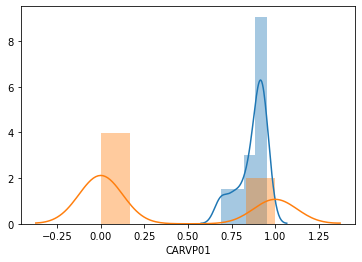

In [198]:
res = cross_val_score(modelClass,X,y, cv=10)
#res = cross_val_score(modelReg,X,y, cv=20)

sns.distplot(res)
sns.distplot(y)

print(f'{res.mean()} +/- {res.std()}')


## pipeline inspection

In [199]:
modelClass.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['KVUNB', 'VIENB', 'VIEMTL', 'UEMNB', 'XLGNB',
                                     'XLGMTL', 'YLVNB', 'ROCNB', 'NPTAG', 'ENDETL',
                                     'GAGETL', 'GAGECL', 'GAGEML', 'FACANL',
                                     'LGAGTL', 'HAVEFL', 'JNBJDL', 'AGER', 'RELAT',
                                     'QSMOY', 'OPGNBL', 'MOYRVL', 'TAVEPL',
                                     'DMVTPL', 'BOPPNL', 'ITAVCL', 'QCREDL',
                                     'YLVMTL']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                   

## gridsearch cv

In [200]:
param_grid = {
    'classifier__learning_rate': [0.5,0.3,0.1,0.01],
    # 'classifier__loss': 'auto',
    # 'classifier__max_bins': 255,
    'classifier__max_depth': [1,3,5,10],
    'classifier__n_estimators': [20,50,100,200, 400]
    #'classifier__max_leaf_nodes': 31,
    #'classifier__min_samples_leaf': 20,
    #'classifier__monotonic_cst': None,
    #'classifier__n_iter_no_change': 10,
 }

In [201]:
grid_search = GridSearchCV(modelClass, param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)

print(("best score from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best score from grid search: 0.901


In [202]:
grid_search.best_params_

{'classifier__learning_rate': 0.3,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50}

## validation curve


### Learning rate

In [203]:
from sklearn.model_selection import validation_curve

In [204]:
param_range=np.logspace(0.001,1,20)

In [205]:
train_scores, test_scores = validation_curve(grid_search.best_estimator_, X_train, y_train, param_name="classifier__learning_rate",param_range=param_range,cv=5,n_jobs=-1)

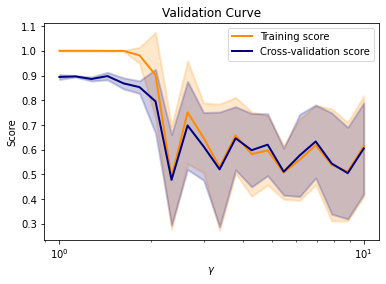

In [206]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### max_depth

In [207]:
param_range=np.logspace(1,10,10)

In [208]:
from copy import copy
new_model = copy(grid_search.best_estimator_)


In [187]:
new_model.steps[1][1]

GradientBoostingClassifier(max_depth=5)

In [210]:
train_scores, test_scores = validation_curve(new_model, X_train, y_train, param_name="classifier__max_depth",param_range=param_range,cv=5,n_jobs=-1)

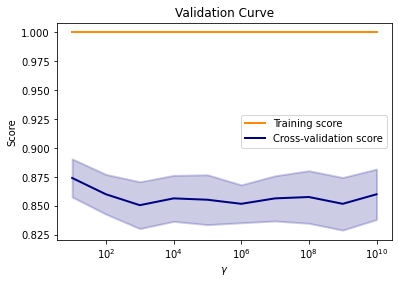

In [211]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### n estimator

In [212]:
param_range=np.linspace(10,200,20)

In [213]:
param_range

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200.])

In [214]:
train_scores, test_scores = validation_curve(grid_search.best_estimator_, X_train, y_train, param_name="classifier__n_estimators",param_range=param_range,cv=5,n_jobs=-1)

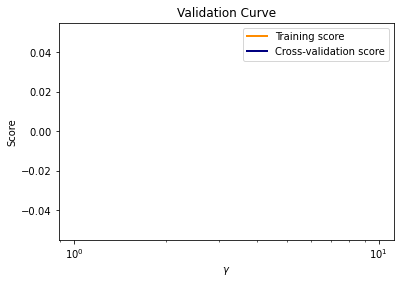

In [215]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## feature

In [216]:
tab = ["KVUNB","VIENB","VIEMTL","UEMNB","XLGNB","XLGMTL","YLVNB","ROCNB","NPTAG","ENDETL","GAGETL","GAGECL","GAGEML","FACANL","LGAGTL","HAVEFL","JNBJDL","AGER","RELAT","QSMOY","OPGNBL","MOYRVL","TAVEPL","DMVTPL","BOPPNL","ITAVCL","QCREDL","YLVMTL","SEXEQ","FAMIQ", "PCSPQ1", "PCSPQ2", "PCSPQ3", "PCSPQ4"]

Text(0.5, 1.0, 'Feature Importance (MDI)')

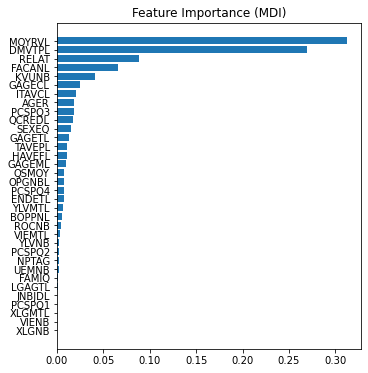

In [217]:
feature_importance = modelClass.steps[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(tab)[sorted_idx])
plt.title('Feature Importance (MDI)')



In [35]:
feature_importance

array([3.42054190e-02, 9.58534374e-04, 4.16259216e-03, 2.10644198e-03,
       8.24439848e-09, 2.23762110e-03, 9.21565049e-04, 1.54476010e-03,
       3.24817907e-03, 2.41089822e-03, 4.42613222e-03, 1.10734261e-02,
       1.87372921e-02, 4.34414850e-02, 3.18380158e-04, 1.54969062e-02,
       4.23665269e-03, 1.22855904e-02, 8.23270497e-02, 3.27026942e-03,
       6.38887819e-03, 3.40903716e-01, 5.09165740e-03, 2.87396246e-01,
       6.22342156e-03, 2.03742476e-02, 2.86350876e-02, 7.31385102e-03,
       1.02080120e-02, 7.61891935e-04, 7.46758502e-04, 1.22145806e-02,
       2.10240476e-02, 5.30839987e-03])

In [218]:


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted
import plotly.express as px


class FeatureImportance:

    """
    
    Extract & Plot the Feature Names & Importance Values from a Scikit-Learn Pipeline.
    
    The input is a Pipeline that starts with a ColumnTransformer & ends with a regression or classification model. 
    As intermediate steps, the Pipeline can have any number or no instances from sklearn.feature_selection.

    Note: 
    If the ColumnTransformer contains Pipelines and if one of the transformers in the Pipeline is adding completely new columns, 
    it must come last in the pipeline. For example, OneHotEncoder, MissingIndicator & SimpleImputer(add_indicator=True) add columns 
    to the dataset that didn't exist before, so there should come last in the Pipeline.
    
    
    Parameters
    ----------
    pipeline : a Scikit-learn Pipeline class where the a ColumnTransformer is the first element and model estimator is the last element
    verbose : a boolean. Whether to print all of the diagnostics. Default is False.
    
    Attributes
    __________
    column_transformer_features :  A list of the feature names created by the ColumnTransformer prior to any selectors being applied
    transformer_list : A list of the transformer names that correspond with the `column_transformer_features` attribute
    discarded_features : A list of the features names that were not selected by a sklearn.feature_selection instance.
    discarding_selectors : A list of the selector names corresponding with the `discarded_features` attribute
    feature_importance :  A Pandas Series containing the feature importance values and feature names as the index.    
    plot_importances_df : A Pandas DataFrame containing the subset of features and values that are actually displaced in the plot. 
    feature_info_df : A Pandas DataFrame that aggregates the other attributes. The index is column_transformer_features. The transformer column contains the transformer_list.
        value contains the feature_importance values. discarding_selector contains discarding_selectors & is_retained is a Boolean indicating whether the feature was retained.
    
    
    
    """
    def __init__(self, pipeline, verbose=False):
        self.pipeline = pipeline
        self.verbose = verbose


    def get_feature_names(self, verbose=None):  

        """

        Get the column names from the a ColumnTransformer containing transformers & pipelines

        Parameters
        ----------
        verbose : a boolean indicating whether to print summaries. 
            default = False


        Returns
        -------
        a list of the correct feature names

        Note: 
        If the ColumnTransformer contains Pipelines and if one of the transformers in the Pipeline is adding completely new columns, 
        it must come last in the pipeline. For example, OneHotEncoder, MissingIndicator & SimpleImputer(add_indicator=True) add columns 
        to the dataset that didn't exist before, so there should come last in the Pipeline.

        Inspiration: https://github.com/scikit-learn/scikit-learn/issues/12525 

        """

        if verbose is None:
            verbose = self.verbose
            
        if verbose: print('''\n\n---------\nRunning get_feature_names\n---------\n''')
        
        column_transformer = self.pipeline[0]        
        assert isinstance(column_transformer, ColumnTransformer), "Input isn't a ColumnTransformer"
        check_is_fitted(column_transformer)

        new_feature_names, transformer_list = [], []

        for i, transformer_item in enumerate(column_transformer.transformers_): 
            
            transformer_name, transformer, orig_feature_names = transformer_item
            orig_feature_names = list(orig_feature_names)
            
            if verbose: 
                print('\n\n', i, '. Transformer/Pipeline: ', transformer_name, ',', 
                      transformer.__class__.__name__, '\n')
                print('\tn_orig_feature_names:', len(orig_feature_names))

            if transformer == 'drop':
                    
                continue
                
            if isinstance(transformer, Pipeline):
                # if pipeline, get the last transformer in the Pipeline
                transformer = transformer.steps[-1][1]

            if hasattr(transformer, 'get_feature_names'):

                if 'input_features' in transformer.get_feature_names.__code__.co_varnames:

                    names = list(transformer.get_feature_names(orig_feature_names))

                else:

                    names = list(transformer.get_feature_names())

            elif hasattr(transformer,'indicator_') and transformer.add_indicator:
                # is this transformer one of the imputers & did it call the MissingIndicator?

                missing_indicator_indices = transformer.indicator_.features_
                missing_indicators = [orig_feature_names[idx] + '_missing_flag'\
                                      for idx in missing_indicator_indices]
                names = orig_feature_names + missing_indicators

            elif hasattr(transformer,'features_'):
                # is this a MissingIndicator class? 
                missing_indicator_indices = transformer.features_
                missing_indicators = [orig_feature_names[idx] + '_missing_flag'\
                                      for idx in missing_indicator_indices]

            else:

                names = orig_feature_names

            if verbose: 
                print('\tn_new_features:', len(names))
                print('\tnew_features:\n', names)

            new_feature_names.extend(names)
            transformer_list.extend([transformer_name] * len(names))
        
        self.transformer_list, self.column_transformer_features = transformer_list,\
                                                                    new_feature_names

        return new_feature_names

    
    def get_selected_features(self, verbose=None):
        """

        Get the Feature Names that were retained after Feature Selection (sklearn.feature_selection)

        Parameters
        ----------
        verbose : a boolean indicating whether to print summaries. default = False

        Returns
        -------
        a list of the selected feature names


        """

        if verbose is None:
            verbose = self.verbose

        assert isinstance(self.pipeline, Pipeline), "Input isn't a Pipeline"

        features = self.get_feature_names()
        
        if verbose: print('\n\n---------\nRunning get_selected_features\n---------\n')
            
        all_discarded_features, discarding_selectors = [], []

        for i, step_item in enumerate(self.pipeline.steps[:]):
            
            step_name, step = step_item

            if hasattr(step, 'get_support'):

                if verbose: print('\nStep ', i, ": ", step_name, ',', 
                                  step.__class__.__name__, '\n')
                    
                check_is_fitted(step)

                feature_mask_dict = dict(zip(features, step.get_support()))
                
                features = [feature for feature, is_retained in feature_mask_dict.items()\
                            if is_retained]
                                         
                discarded_features = [feature for feature, is_retained in feature_mask_dict.items()\
                                      if not is_retained]
                
                all_discarded_features.extend(discarded_features)
                discarding_selectors.extend([step_name] * len(discarded_features))
                
                
                if verbose: 
                    print(f'\t{len(features)} retained, {len(discarded_features)} discarded')
                    if len(discarded_features) > 0:
                        print('\n\tdiscarded_features:\n\n', discarded_features)

        self.discarded_features, self.discarding_selectors = all_discarded_features,\
                                                                discarding_selectors
        
        return features

    def get_feature_importance(self):
        
        """
        Creates a Pandas Series where values are the feature importance values from the model and feature names are set as the index. 
        
        This Series is stored in the `feature_importance` attribute.

        Returns
        -------
        A pandas Series containing the feature importance values and feature names as the index.
        
        """
        
        assert isinstance(self.pipeline, Pipeline), "Input isn't a Pipeline"

        features = self.get_selected_features()
             
        assert hasattr(self.pipeline[-1], 'feature_importances_'),\
            "The last element in the pipeline isn't an estimator with a feature_importances_ attribute"
        
        importance_values = self.pipeline[-1].feature_importances_
        
        assert len(features) == len(importance_values),\
            "The number of feature names & importance values doesn't match"
        
        feature_importance = pd.Series(importance_values, index=features)
        self.feature_importance = feature_importance
        
        # create feature_info_df
        column_transformer_df =\
            pd.DataFrame(dict(transformer=self.transformer_list),
                         index=self.column_transformer_features)

        discarded_features_df =\
            pd.DataFrame(dict(discarding_selector=self.discarding_selectors),
                         index=self.discarded_features)

        importance_df = self.feature_importance.rename('value').to_frame()

        self.feature_info_df = \
            column_transformer_df\
            .join([importance_df, discarded_features_df])\
            .assign(is_retained = lambda df: ~df.value.isna())        


        return feature_importance
        
    
    def plot(self, top_n_features=100, rank_features=True, max_scale=True, 
             display_imp_values=True, display_imp_value_decimals=1,
             height_per_feature=25, orientation='h', width=750, height=None, 
             str_pad_width=15, yaxes_tickfont_family='Courier New', 
             yaxes_tickfont_size=15):
        """

        Plot the Feature Names & Importances 


        Parameters
        ----------

        top_n_features : the number of features to plot, default is 100
        rank_features : whether to rank the features with integers, default is True
        max_scale : Should the importance values be scaled by the maximum value & mulitplied by 100?  Default is True.
        display_imp_values : Should the importance values be displayed? Default is True.
        display_imp_value_decimals : If display_imp_values is True, how many decimal places should be displayed. Default is 1.
        height_per_feature : if height is None, the plot height is calculated by top_n_features * height_per_feature. 
        This allows all the features enough space to be displayed
        orientation : the plot orientation, 'h' (default) or 'v'
        width :  the width of the plot, default is 500
        height : the height of the plot, the default is top_n_features * height_per_feature
        str_pad_width : When rank_features=True, this number of spaces to add between the rank integer and feature name. 
            This will enable the rank integers to line up with each other for easier reading. 
            Default is 15. If you have long feature names, you can increase this number to make the integers line up more.
            It can also be set to 0.
        yaxes_tickfont_family : the font for the feature names. Default is Courier New.
        yaxes_tickfont_size : the font size for the feature names. Default is 15.

        Returns
        -------
        plot

        """
        if height is None:
            height = top_n_features * height_per_feature
            
        # prep the data
        
        all_importances = self.get_feature_importance()
        n_all_importances = len(all_importances)
        
        plot_importances_df =\
            all_importances\
            .nlargest(top_n_features)\
            .sort_values()\
            .to_frame('value')\
            .rename_axis('feature')\
            .reset_index()
                
        if max_scale:
            plot_importances_df['value'] = \
                                plot_importances_df.value.abs() /\
                                plot_importances_df.value.abs().max() * 100
            
        self.plot_importances_df = plot_importances_df.copy()
        
        if len(all_importances) < top_n_features:
            title_text = 'All Feature Importances'
        else:
            title_text = f'Top {top_n_features} (of {n_all_importances}) Feature Importances'       
        
        if rank_features:
            padded_features = \
                plot_importances_df.feature\
                .str.pad(width=str_pad_width)\
                .values
            
            ranked_features =\
                plot_importances_df.index\
                .to_series()\
                .sort_values(ascending=False)\
                .add(1)\
                .astype(str)\
                .str.cat(padded_features, sep='. ')\
                .values

            plot_importances_df['feature'] = ranked_features
        
        if display_imp_values:
            text = plot_importances_df.value.round(display_imp_value_decimals)
        else:
            text = None

        # create the plot 
        
        fig = px.bar(plot_importances_df, 
                     x='value', 
                     y='feature',
                     orientation=orientation, 
                     width=width, 
                     height=height,
                     text=text)
        fig.update_layout(title_text=title_text, title_x=0.5) 
        fig.update(layout_showlegend=False)
        fig.update_yaxes(tickfont=dict(family=yaxes_tickfont_family, 
                                       size=yaxes_tickfont_size),
                         title='')
        fig.show()

In [219]:

feature_importance = FeatureImportance(modelClass)
feature_importance.plot(top_n_features=34)

In [25]:
data["DMVTPL"]
data["MOYRVL"]

148009     4.753590
552427     3.713572
556005     2.890372
556686     5.926926
642680     3.218876
             ...   
7567726    0.000000
7572458    0.000000
7574479    2.708050
7580358    2.197225
7589439    0.693147
Name: MOYRVL, Length: 1063, dtype: float64

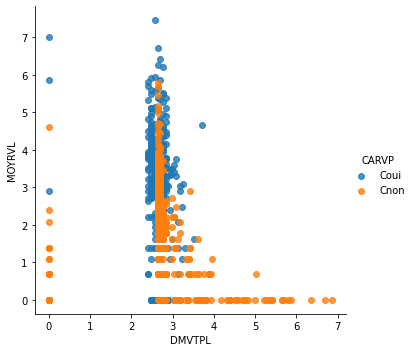

In [162]:
g = sns.lmplot(x="DMVTPL", y="MOYRVL", hue="CARVP", data=data,fit_reg=False)

## score val

In [190]:
import plotly.express as px
from sklearn.metrics import  auc, roc_curve



y_score = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# The histogram of scores compared to true labels
fig_hist = px.histogram(
    x=y_score, color=y_test, nbins=50,
    labels=dict(color='True Labels', x='Score')
)

fig_hist.show()


# Evaluating model performance at various thresholds
df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
}, index=thresholds)
df.index.name = "Thresholds"
df.columns.name = "Rate"

fig_thresh = px.line(
    df, title='TPR and FPR at every threshold',
    width=700, height=500
)

fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
fig_thresh.update_xaxes(range=[0, 1], constrain='domain')
fig_thresh.show()




y_score = grid_search.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()
